In [1]:
import numpy as np
import pandas as pd
from itertools import chain
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./Data_Entry_2017_v2020.csv')
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [3]:
df['Finding Labels'].value_counts()[:50]

No Finding                             60361
Infiltration                            9547
Atelectasis                             4215
Effusion                                3955
Nodule                                  2705
Pneumothorax                            2194
Mass                                    2139
Effusion|Infiltration                   1603
Atelectasis|Infiltration                1350
Consolidation                           1310
Atelectasis|Effusion                    1165
Pleural_Thickening                      1126
Cardiomegaly                            1093
Emphysema                                892
Infiltration|Nodule                      829
Atelectasis|Effusion|Infiltration        737
Fibrosis                                 727
Edema                                    628
Cardiomegaly|Effusion                    484
Consolidation|Infiltration               441
Infiltration|Mass                        420
Effusion|Pneumothorax                    403
Effusion|M

In [4]:
df['Finding Labels'].value_counts()[:20].sum()

97501

In [5]:
pd.Series(chain(*df['Finding Labels'].apply(lambda x:x.split('|')))).value_counts()

No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
dtype: int64

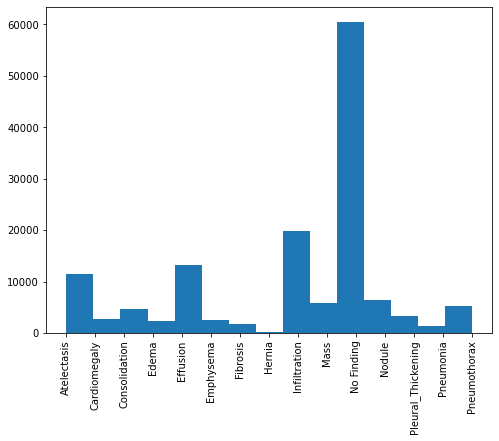

In [29]:
plt.figure(figsize=(8,6))
plt.hist(sorted(chain(*df['Finding Labels'].apply(lambda x:x.split('|')))),bins=15)
plt.xticks(rotation=90);

In [8]:
df['Patient ID'].value_counts()

10007    184
13670    173
15530    158
12834    157
13993    143
        ... 
18706      1
20753      1
22800      1
8415       1
2047       1
Name: Patient ID, Length: 30805, dtype: int64

In [9]:
df[df['Follow-up #']==0]['Finding Labels'].value_counts()[:20]


No Finding                  21403
Infiltration                 2423
Nodule                        893
Atelectasis                   867
Mass                          631
Cardiomegaly                  461
Effusion                      383
Pleural_Thickening            368
Fibrosis                      293
Infiltration|Nodule           206
Emphysema                     181
Atelectasis|Infiltration      145
Consolidation                 143
Pneumothorax                  137
Mass|Nodule                   121
Cardiomegaly|Effusion         120
Atelectasis|Effusion           98
Effusion|Infiltration          82
Infiltration|Mass              79
Effusion|Mass                  64
Name: Finding Labels, dtype: int64

In [10]:
labels=sorted(set(chain(*df['Finding Labels'].apply(lambda x:x.split('|')))))

In [11]:
for label in labels:
    df[label]= df['Finding Labels'].apply(lambda x:1 if label in x else 0)

In [35]:
df[df.columns[-len(labels):]].sum()

Atelectasis           11559
Cardiomegaly           2776
Consolidation          4667
Edema                  2303
Effusion              13317
Emphysema              2516
Fibrosis               1686
Hernia                  227
Infiltration          19894
Mass                   5782
No Finding            60361
Nodule                 6331
Pleural_Thickening     3385
Pneumonia              1431
Pneumothorax           5302
dtype: int64

In [41]:
df[df.columns[:2].tolist()+df.columns[-15:].tolist()].sample(10)

,Image Index,Finding Labels,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
93105,00023269_002.png,Atelectasis,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79933,00019639_009.png,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
78056,00019169_015.png,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
74513,00018284_017.png,Mass,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
39219,00010294_003.png,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
36978,00009735_000.png,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
102117,00027196_017.png,Atelectasis|Infiltration,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
105767,00028469_000.png,No Finding,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
79069,00019405_001.png,Infiltration,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17993,00004832_024.png,Consolidation|Infiltration,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [19]:
output_vector=df[df.columns[-15:]].apply(lambda x:np.array(x),axis=1)
output_vector

0         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1         [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2         [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
4         [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
                              ...                      
112115    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
112116    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
112117    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
112118    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
112119    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Length: 112120, dtype: object

In [38]:
final=pd.DataFrame({'image':df['Image Index'],'label':df['Finding Labels'],'label_vector':output_vector})
final.sample(10)

,image,label,label_vector
58694,00014526_001.png,No Finding,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
38610,00010081_000.png,No Finding,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
74385,00018253_064.png,Atelectasis|Infiltration|Pleural_Thickening,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]"
17018,00004562_000.png,No Finding,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
70745,00017446_000.png,Effusion|Infiltration|Pleural_Thickening,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]"
39176,00010270_013.png,No Finding,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
80312,00019739_001.png,Mass,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
52072,00013128_017.png,Pleural_Thickening,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
60739,00015000_010.png,No Finding,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
8705,00002300_013.png,Atelectasis|Consolidation|Pneumothorax,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"


In [21]:
labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [60]:
df['View Position'].value_counts()

PA    67310
AP    44810
Name: View Position, dtype: int64

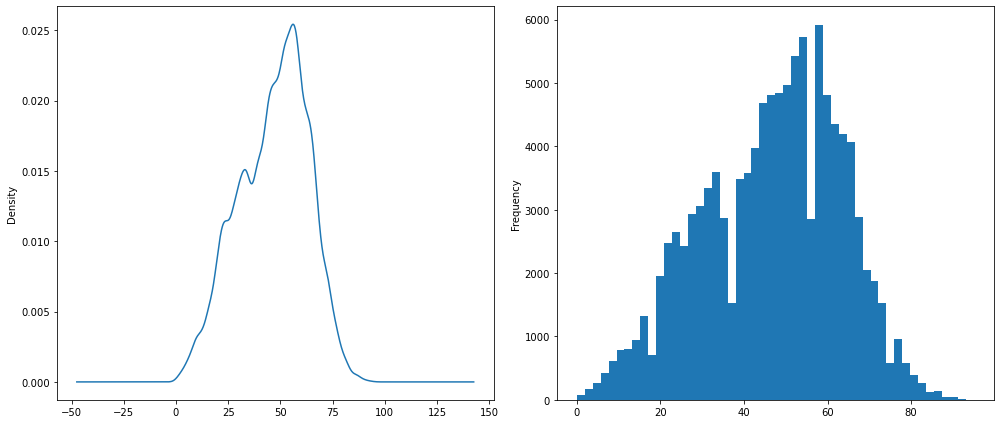

In [61]:
plt.figure(figsize=(14,6))
plt.subplot(121);df['Patient Age'].plot(kind='kde')
plt.subplot(122);df['Patient Age'].plot(kind='hist',bins=50)
plt.tight_layout()